Import Dataset

In [1]:
dataset="/kaggle/input/sandstone-dataset/sandstone"

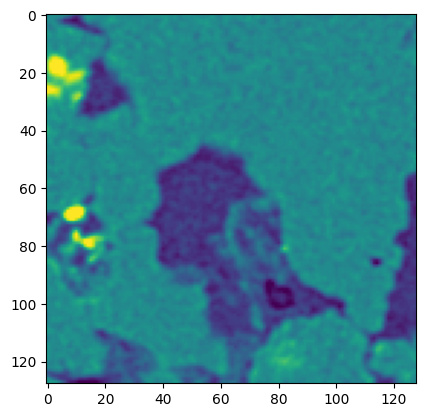

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
img = mpimg.imread('/kaggle/input/sandstone-dataset/sandstone/images/image_1.tif')
imgplot = plt.imshow(img)
plt.show()

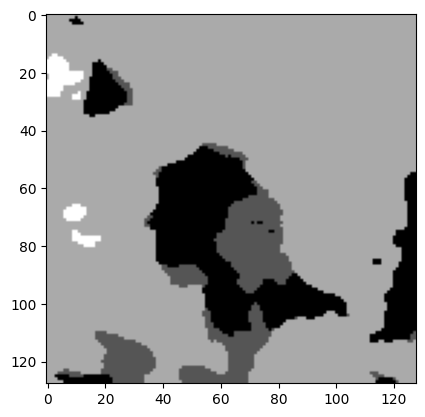

In [3]:
import cv2
import matplotlib.pyplot as plt
mask = cv2.imread('/kaggle/input/sandstone-dataset/sandstone/masks/image_1.tif', 0)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(mask, cmap='gray')

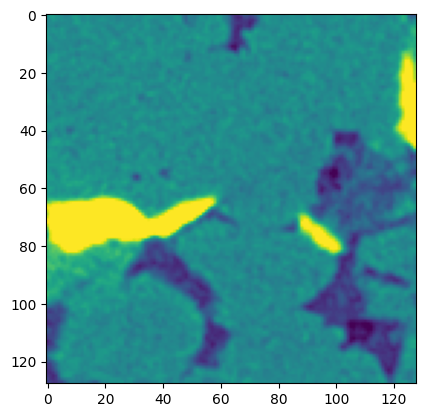

(128, 128)

In [4]:
img = mpimg.imread('/kaggle/input/sandstone-dataset/sandstone/images/image_1022.tif')
imgplot = plt.imshow(img)
plt.show()
img.shape

In [5]:
print(img.flatten())

[138 143 139 ... 117 113 117]


In [6]:
print(np.unique(mask))

[1 2 3 4]


**Build Muiticlass U_net Model **

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [4]:
def unet_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Encoder
    conv1 = layers.Conv2D(64, 3, activation="relu", padding="same")(inputs)
    conv1 = layers.Conv2D(64, 3, activation="relu", padding="same")(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(128, 3, activation="relu", padding="same")(pool1)
    conv2 = layers.Conv2D(128, 3, activation="relu", padding="same")(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = layers.Conv2D(256, 3, activation="relu", padding="same")(pool2)
    conv3 = layers.Conv2D(256, 3, activation="relu", padding="same")(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = layers.Conv2D(512, 3, activation="relu", padding="same")(pool3)
    conv4 = layers.Conv2D(512, 3, activation="relu", padding="same")(conv4)
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(conv4)

    # Bottleneck
    conv5 = layers.Conv2D(1024, 3, activation="relu", padding="same")(pool4)
    conv5 = layers.Conv2D(1024, 3, activation="relu", padding="same")(conv5)

    # Decoder
    up6 = layers.Conv2DTranspose(512, 2, strides=(2, 2), padding="same")(conv5)
    merge6 = layers.concatenate([conv4, up6], axis=3)
    conv6 = layers.Conv2D(512, 3, activation="relu", padding="same")(merge6)
    conv6 = layers.Conv2D(512, 3, activation="relu", padding="same")(conv6)

    up7 = layers.Conv2DTranspose(256, 2, strides=(2, 2), padding="same")(conv6)
    merge7 = layers.concatenate([conv3, up7], axis=3)
    conv7 = layers.Conv2D(256, 3, activation="relu", padding="same")(merge7)
    conv7 = layers.Conv2D(256, 3, activation="relu", padding="same")(conv7)

    up8 = layers.Conv2DTranspose(128, 2, strides=(2, 2), padding="same")(conv7)
    merge8 = layers.concatenate([conv2, up8], axis=3)
    conv8 = layers.Conv2D(128, 3, activation="relu", padding="same")(merge8)
    conv8 = layers.Conv2D(128, 3, activation="relu", padding="same")(conv8)

    up9 = layers.Conv2DTranspose(64, 2, strides=(2, 2), padding="same")(conv8)
    merge9 = layers.concatenate([conv1, up9], axis=3)
    conv9 = layers.Conv2D(64, 3, activation="relu", padding="same")(merge9)
    conv9 = layers.Conv2D(64, 3, activation="relu", padding="same")(conv9)

    outputs = layers.Conv2D(num_classes, 1, activation="softmax")(conv9)

    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

# Example usage:
input_shape = (128, 128, 3)  # Replace with your actual input shape
num_classes = 4
model = unet_model(input_shape, num_classes)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 128, 128,  │      1,792 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 128, 128,  │     36,928 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 64, 64,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 64, 64,    │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 64, 64,    │    147,584 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 32, 32,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 32, 32,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 32, 32,    │    590,080 │ conv2d_4[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 16, 16,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 16, 16,    │  1,180,160 │ max_pooling2d_2[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 16, 16,    │  2,359,808 │ conv2d_6[0][0]    │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 8, 8, 512) │          0 │ conv2d_7[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 8, 8,      │  4,719,616 │ max_pooling2d_3[… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 8, 8,      │  9,438,208 │ conv2d_8[0][0]    │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose    │ (None, 16, 16,    │  2,097,664 │ conv2d_9[0][0]    │
│ (Conv2DTranspose)   │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 16, 16,    │          0 │ conv2d_7[0][0], 

 Total params: 31,031,940 (118.38 MB)

 Trainable params: 31,031,940 (118.38 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:

import os
import numpy as np
from PIL import Image

image_dir = '/kaggle/input/sandstone-dataset/sandstone/images'
mask_dir = '/kaggle/input/sandstone-dataset/sandstone/masks'

image_files = sorted(os.listdir(image_dir))
mask_files = sorted(os.listdir(mask_dir))

images = []
masks = []

for i in range(len(image_files)):
  try:
    # Open image and convert to RGB if necessary
    img = Image.open(os.path.join(image_dir, image_files[i])).convert('RGB')  # Ensure RGB format
    img = img.resize((128, 128))
    img_arr = np.array(img)
    images.append(img_arr)

    mask = Image.open(os.path.join(mask_dir, mask_files[i]))
    mask = mask.resize((128, 128))
    mask_arr = np.array(mask)
    masks.append(mask_arr)
  except Exception as e:
    print(f"Error processing file {image_files[i]} or {mask_files[i]}: {e}")
    continue

In [7]:
import os
import numpy as np
from PIL import Image
from tensorflow.keras.utils import to_categorical

image_dir = '/kaggle/input/sandstone-dataset/sandstone/images'
mask_dir = '/kaggle/input/sandstone-dataset/sandstone/masks'

image_files = sorted(os.listdir(image_dir))
mask_files = sorted(os.listdir(mask_dir))

images = []
masks = []

for i in range(len(image_files)):
    try:
        # Open image and convert to RGB if necessary
        img = Image.open(os.path.join(image_dir, image_files[i])).convert('RGB')  # Ensure RGB format
        img = img.resize((128, 128))
        img_arr = np.array(img)
        images.append(img_arr)

        mask = Image.open(os.path.join(mask_dir, mask_files[i]))
        mask = mask.resize((128, 128))
        mask_arr = np.array(mask)

        # Ensure mask values are within the expected range (0-3 for 4 classes)
        mask_arr[mask_arr >= 4] = 3 # If they are not, change the values to the max of the desired range(3)

        masks.append(mask_arr)
    except Exception as e:
        print(f"Error processing file {image_files[i]} or {mask_files[i]}: {e}")
        continue

# Shift masks values by 1 to be within range 0-3

masks = [mask - 1 for mask in masks] # Use list comprehension to subtract 1 from each NumPy array in the list.


masks = to_categorical(masks, num_classes=4) # masks must be within range 0-3 for this to work

# Normalize pixel values
images = np.array(images)

images = images / 255.0

# Split data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(images, masks, test_size=0.2, random_state=42)


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Train the model
history = model.fit(X_train, y_train, epochs=15, batch_size=16, validation_data=(X_val, y_val))

Epoch 1/15


I0000 00:00:1731987802.947205     102 service.cc:145] XLA service 0x7e718c0041f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731987802.947259     102 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1731987802.947281     102 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1731987842.757175     102 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


80/80 ━━━━━━━━━━━━━━━━━━━━ 65s 253ms/step - accuracy: 0.7921 - loss: 0.5426 - val_accuracy: 0.9212 - val_loss: 0.1929
Epoch 2/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 18s 223ms/step - accuracy: 0.9279 - loss: 0.1888 - val_accuracy: 0.9245 - val_loss: 0.1807
Epoch 3/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 18s 219ms/step - accuracy: 0.9376 - loss: 0.1544 - val_accuracy: 0.9617 - val_loss: 0.1031
Epoch 4/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 18s 220ms/step - accuracy: 0.9457 - loss: 0.1588 - val_accuracy: 0.9565 - val_loss: 0.1071
Epoch 5/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 18s 223ms/step - accuracy: 0.9514 - loss: 0.1323 - val_accuracy: 0.9656 - val_loss: 0.0854
Epoch 6/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 18s 222ms/step - accuracy: 0.9529 - loss: 0.1384 - val_accuracy: 0.9630 - val_loss: 0.0910
Epoch 7/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 18s 220ms/step - accuracy: 0.9533 - loss: 0.1215 - val_accuracy: 0.9594 - val_loss: 0.0996
Epoch 8/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 18s 219ms/step - accuracy: 0.9684 - loss: 0.0784 - val_accuracy: 0.957

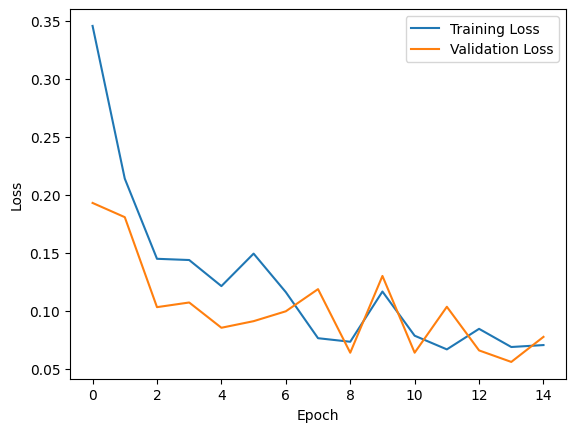

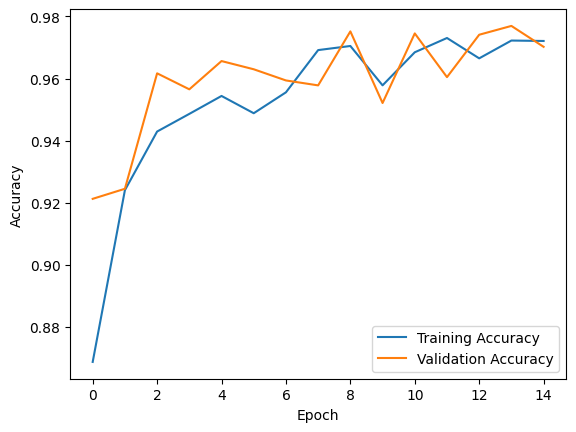

In [9]:
# prompt: plot the loss curve and accuracy

import matplotlib.pyplot as plt
# Plot the loss curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 25s 129ms/step


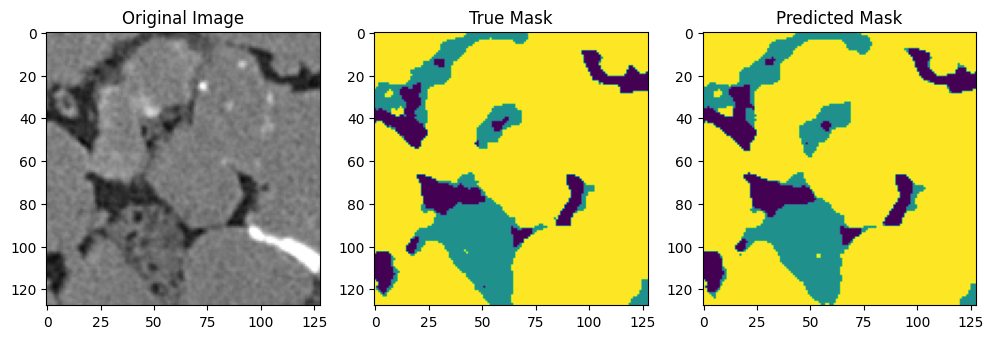

In [10]:
# Predict on the validation set
predictions = model.predict(X_val)

# Choose a random image from the validation set
import random
random_index = random.randint(0, len(X_val) - 1)
predicted_mask = np.argmax(predictions[random_index], axis=-1)
true_mask = np.argmax(y_val[random_index], axis=-1)

# Display the image, true mask, and predicted mask
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(X_val[random_index])
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(true_mask)
plt.title('True Mask')

plt.subplot(1, 3, 3)
plt.imshow(predicted_mask)
plt.title('Predicted Mask')

plt.show()